In [1]:
import findspark
findspark.init("C:\spark")

In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

In [3]:
spark=SparkSession.builder \
    .master("local") \
    .appName("churn_uygulama") \
    .getOrCreate()

sc=spark.sparkContext
sc

<SparkContext master=local appName=churn_uygulama>

In [4]:
spark_df=spark.read.csv("churn.csv",header=True,inferSchema=True) 
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [5]:
spark_df.count() 

900

In [6]:
len(spark_df.columns) 

8

In [7]:
spark_df.printSchema() 

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [8]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows


In [9]:
spark_df.dropna().count()

900

In [10]:
spark_df=spark_df.withColumnRenamed("_c0","index")

In [11]:
spark_df.columns

['index',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [12]:
spark_df=spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [13]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [14]:
spark_df.select("names").distinct().count()

899

In [15]:
spark_df.groupby("names").count().sort("count",ascending=False).show(5)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
|     John Barber|    1|
+----------------+-----+
only showing top 5 rows


In [16]:
spark_df.filter(spark_df.names=="Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [17]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [18]:
spark_df.describe().transpose().toPandas()

,key,count,max,mean,min,stddev
0,index,900,899,449.5,0,259.95191863111916
1,names,900,Zachary Walsh,None,Aaron King,None
2,age,900,65.0,41.81666666666667,22.0,6.127560416916251
3,total_purchase,900,18026.01,10062.82403333334,100.0,2408.644531858096
4,account_manager,900,1,0.4811111111111111,0,0.4999208935073339
5,years,900,9.15,5.27315555555555,1.0,1.274449013194616
6,num_sites,900,14.0,8.587777777777777,3.0,1.7648355920350969
7,churn,900,1,0.16666666666666666,0,0.3728852122772358


In [19]:
kor_data=spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").toPandas()

In [20]:
from scipy.stats import kstest

In [21]:
kstest(kor_data.age,'norm')[1]

0.0

In [22]:
spark_df.groupby("churn").agg({"age":"median"}).show()

+-----+-----------+
|churn|median(age)|
+-----+-----------+
|    1|       43.0|
|    0|       41.0|
+-----+-----------+



In [23]:
kstest(kor_data.total_purchase,'norm')[1]

0.0

In [24]:
spark_df.groupby("churn").agg({"total_purchase":"median"}).show()

+-----+----------------------+
|churn|median(total_purchase)|
+-----+----------------------+
|    1|              10273.76|
|    0|              9999.705|
+-----+----------------------+



In [25]:
kstest(kor_data.years,'norm')[1]

0.0

In [26]:
spark_df.groupby("churn").agg({"years":"median"}).show()

+-----+-------------+
|churn|median(years)|
+-----+-------------+
|    1|          5.8|
|    0|         5.08|
+-----+-------------+



In [27]:
kstest(kor_data.num_sites,'norm')[1]

0.0

In [28]:
spark_df.groupby("churn").agg({"num_sites":"median"}).show()

+-----+-----------------+
|churn|median(num_sites)|
+-----+-----------------+
|    1|             11.0|
|    0|              8.0|
+-----+-----------------+



In [29]:
spark_df.groupby("account_manager").agg({"age":"median"}).show()

+---------------+-----------+
|account_manager|median(age)|
+---------------+-----------+
|              1|       41.0|
|              0|       42.0|
+---------------+-----------+



In [30]:
spark_df.groupby("account_manager").agg({"total_purchase":"median"}).show()

+---------------+----------------------+
|account_manager|median(total_purchase)|
+---------------+----------------------+
|              1|               10054.6|
|              0|              10041.13|
+---------------+----------------------+



In [31]:
spark_df.groupby("account_manager").agg({"years":"median"}).show()

+---------------+-------------+
|account_manager|median(years)|
+---------------+-------------+
|              1|         5.27|
|              0|         5.16|
+---------------+-------------+



In [32]:
spark_df.groupby("account_manager").agg({"num_sites":"median"}).show()

+---------------+-----------------+
|account_manager|median(num_sites)|
+---------------+-----------------+
|              1|              9.0|
|              0|              8.0|
+---------------+-----------------+



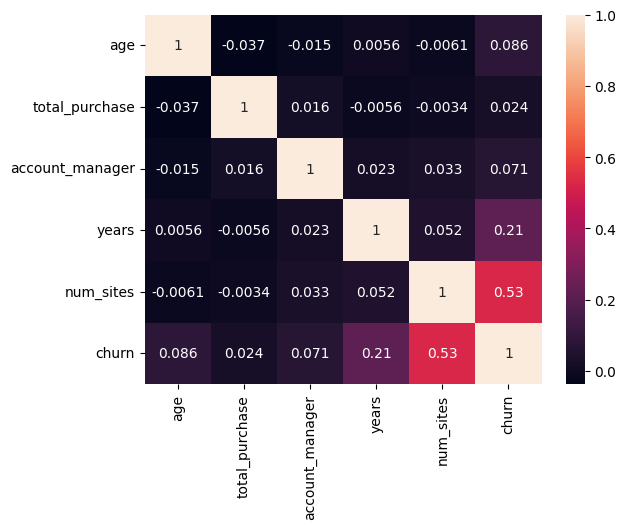

In [33]:
import seaborn as sns
sns.heatmap(kor_data.corr(),annot=True);

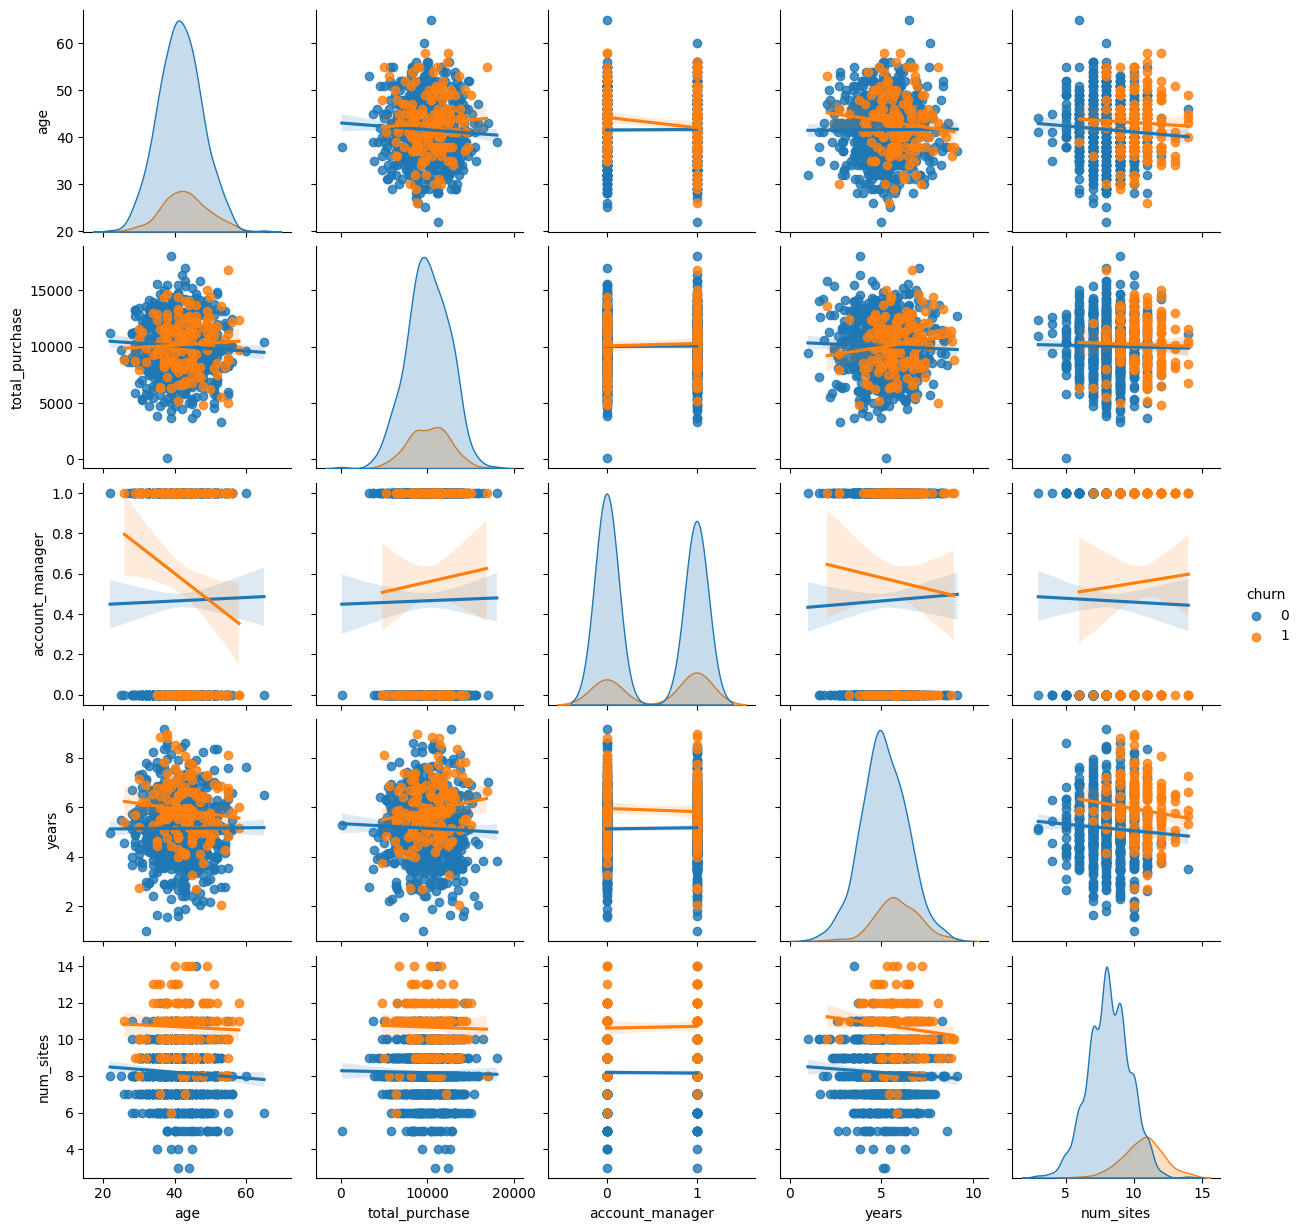

In [34]:
sns.pairplot(kor_data,hue="churn",kind="reg");

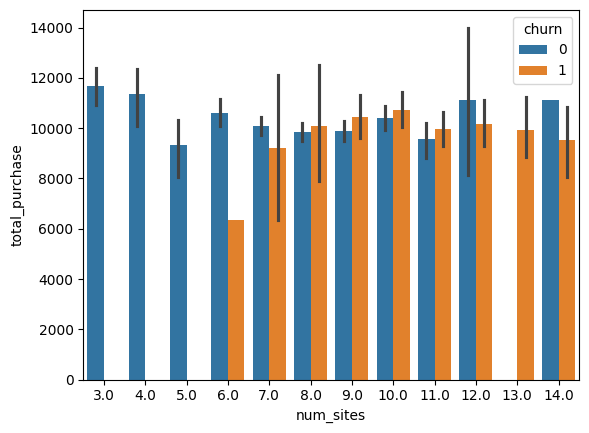

In [35]:
sns.barplot(x=kor_data.num_sites,y=kor_data.total_purchase,hue=kor_data.churn);

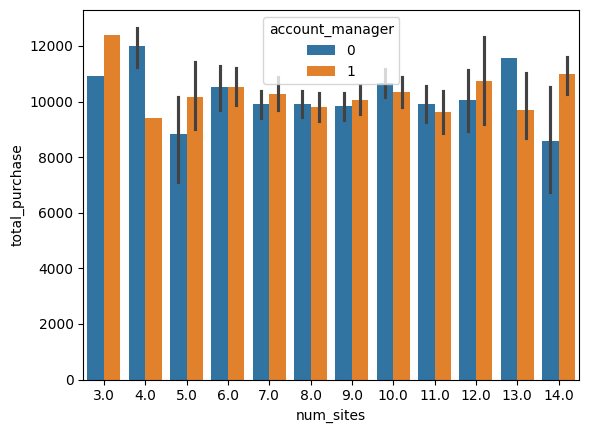

In [36]:
sns.barplot(x=kor_data.num_sites,y=kor_data.total_purchase,hue=kor_data.account_manager);

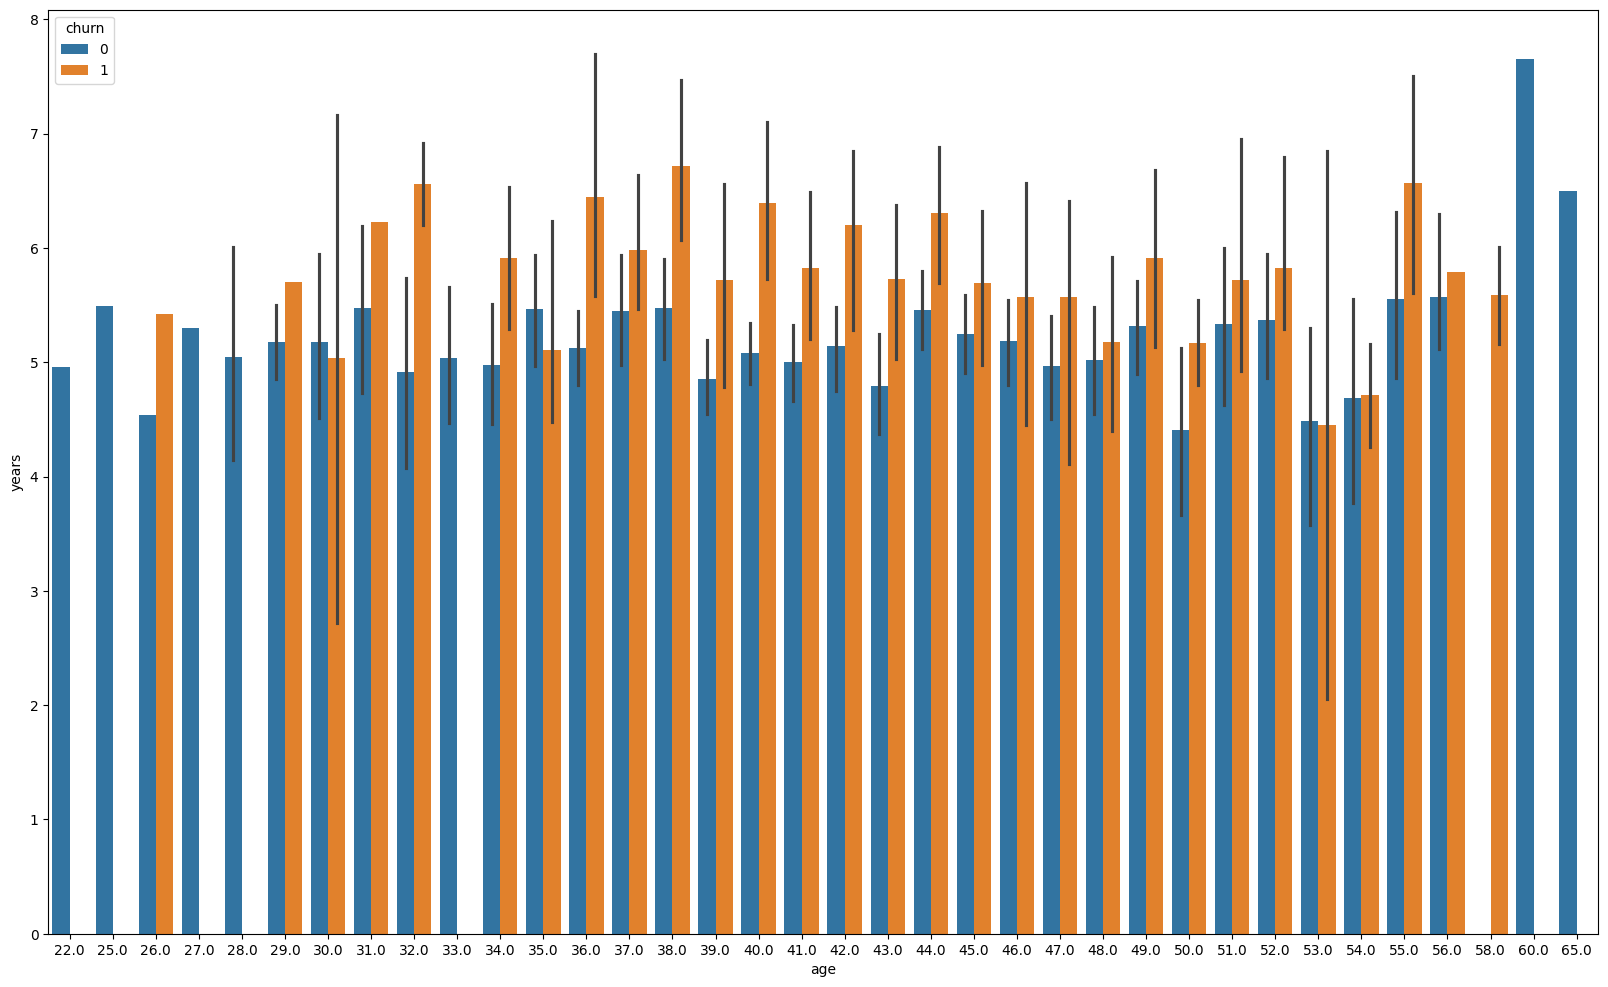

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
sns.barplot(x=kor_data.age,y=kor_data.years,hue=kor_data.churn);

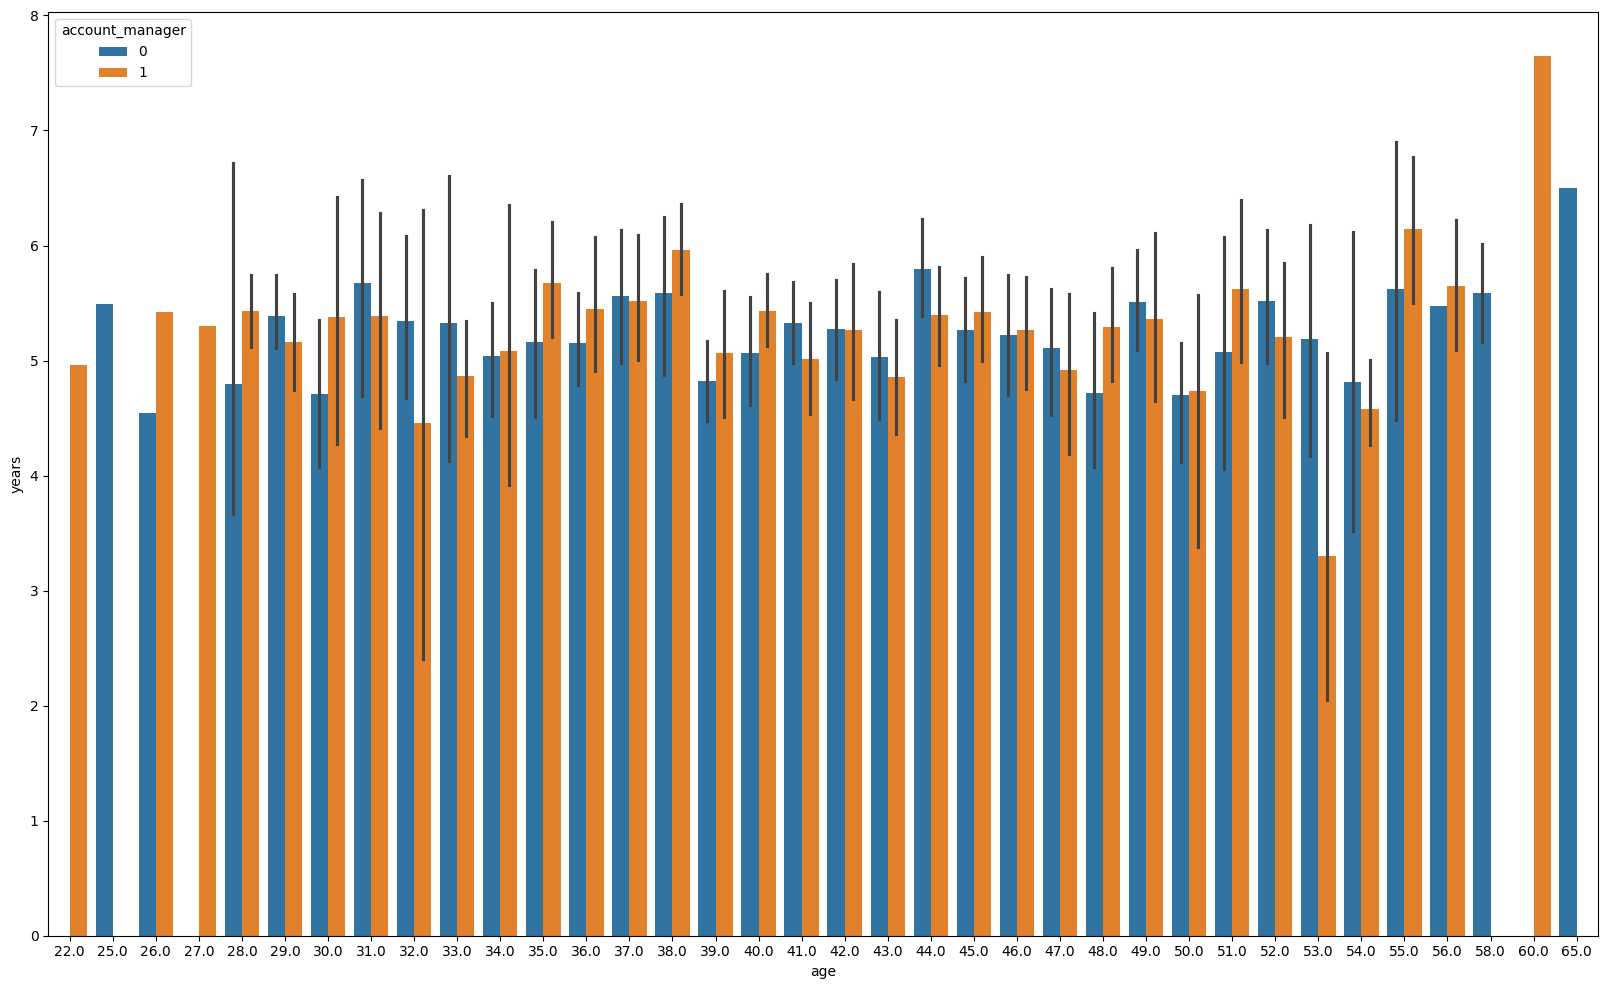

In [38]:
plt.figure(figsize=(20,12))
sns.barplot(x=kor_data.age,y=kor_data.years,hue=kor_data.account_manager);

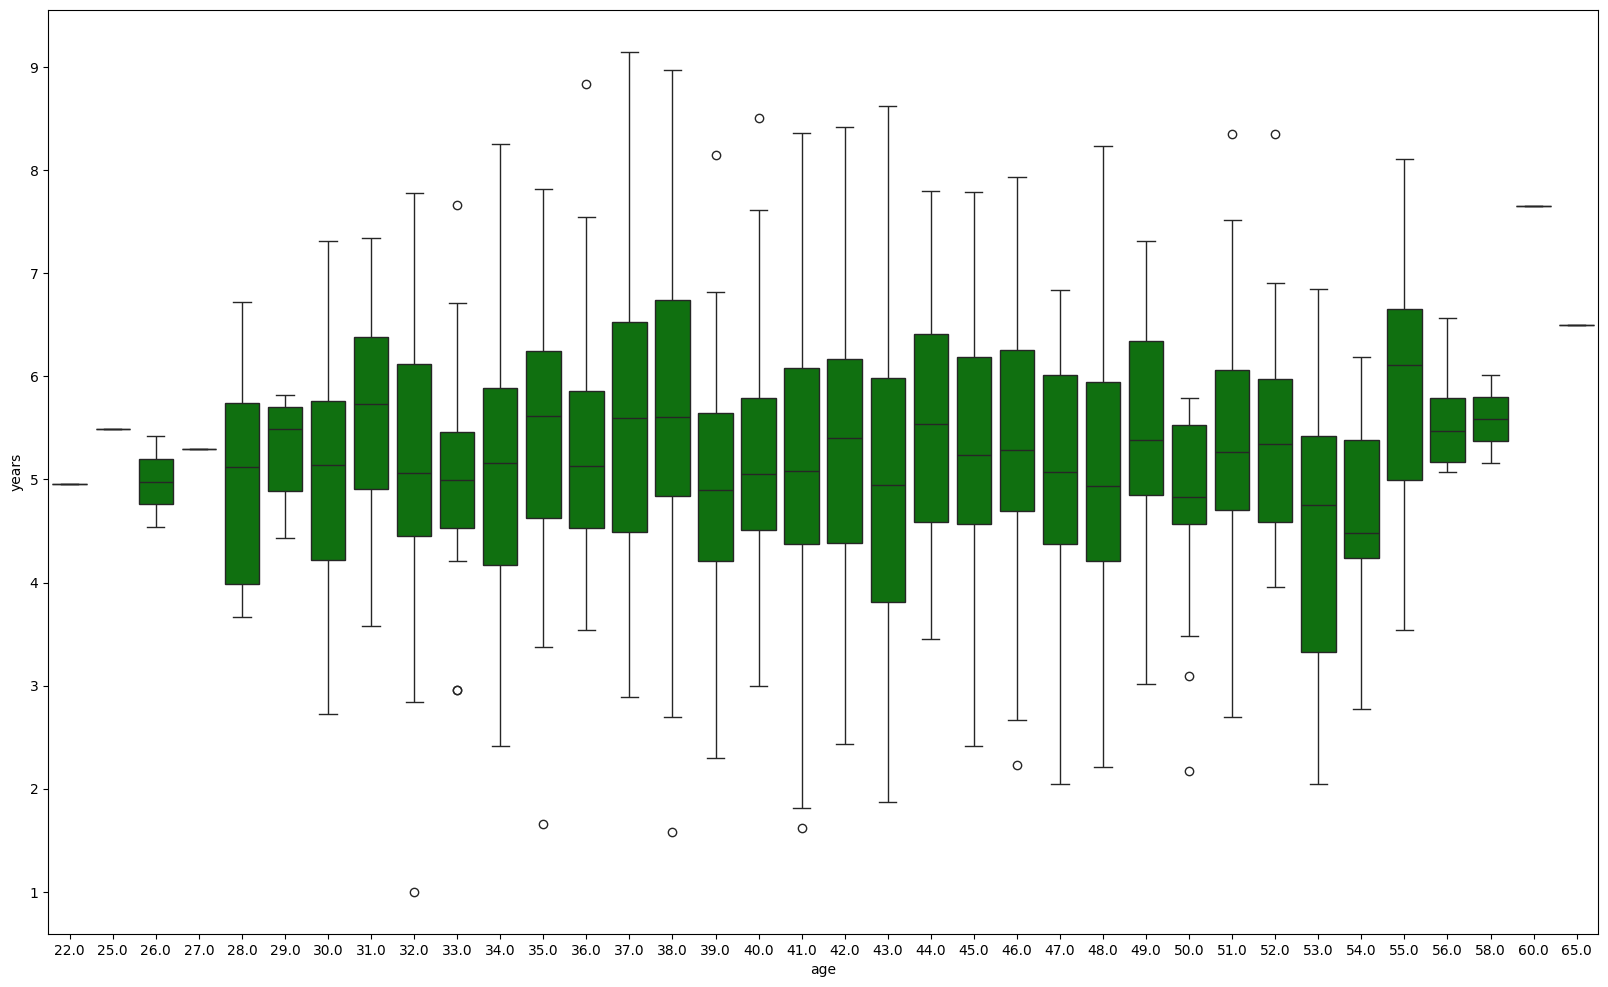

In [39]:
plt.figure(figsize=(20,12))
sns.boxplot(x=kor_data.age,y=kor_data.years,color="green");

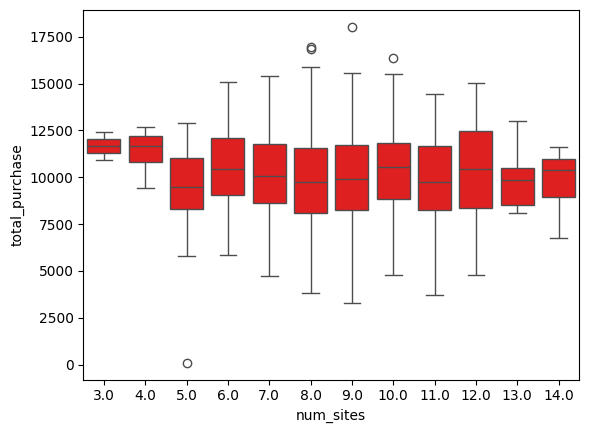

In [40]:
sns.boxplot(x=kor_data.num_sites,y=kor_data.total_purchase,color="red");

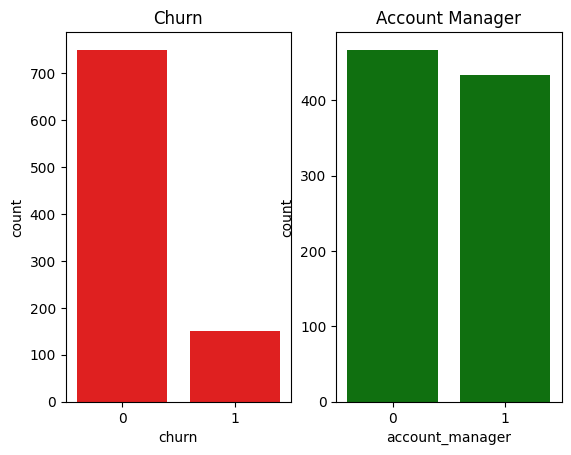

In [41]:
plt.subplot(1,2,1)
plt.title('Churn')
sns.countplot(x=kor_data.churn,color='red')

plt.subplot(1,2,2)
plt.title('Account Manager')
sns.countplot(x=kor_data.account_manager,color='green');

In [42]:
from pyspark.ml.feature import StringIndexer

In [43]:
stringIndexer=StringIndexer(inputCol="churn",outputCol="label")

In [44]:
indexed=stringIndexer.fit(spark_df).transform(spark_df)

In [45]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('label', 'double')]

In [46]:
spark_df=indexed.withColumn("label",indexed["label"].cast("integer"))

In [47]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('label', 'int')]

In [48]:
from pyspark.ml.feature import VectorAssembler

In [49]:
bag=["age","total_purchase","account_manager","years","num_sites"]

In [50]:
vectorAssembler=VectorAssembler(inputCols=bag,outputCol="features")

In [51]:
va_df=vectorAssembler.transform(spark_df)

In [52]:
final_df=va_df.select(["features","label"])

In [53]:
final_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
+--------------------+-----+
only showing top 3 rows


In [54]:
train_df,test_df=final_df.randomSplit([0.7,0.3])

In [55]:
from pyspark.ml.classification import GBTClassifier

In [56]:
gbm=GBTClassifier(maxIter=10,featuresCol="features",labelCol="label")

In [57]:
gbm_model=gbm.fit(train_df)

In [58]:
y_pred=gbm_model.transform(test_df)

In [59]:
ac=y_pred.select("label","prediction")

In [60]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.8712121212121212

In [61]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder,CrossValidator

evaluator=BinaryClassificationEvaluator()

param_grid=(ParamGridBuilder()
           .addGrid(gbm.maxDepth,[2,4,6])
           .addGrid(gbm.maxBins,[20,30])
           .addGrid(gbm.maxIter,[10,20])
           .build()
)

cv=CrossValidator(estimator=gbm,estimatorParamMaps=param_grid,evaluator=evaluator,numFolds=10)

In [62]:
cv_model=cv.fit(train_df)

In [63]:
y_pred=cv_model.transform(test_df)

In [64]:
ac=y_pred.select("label","prediction")

In [65]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.9015151515151515

In [66]:
evaluator.evaluate(y_pred)

0.8967596428242657